In [1]:
import pandas as pd
import numpy as np
from os import path

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
mpl.style.use('seaborn-notebook')
#sorted(mpl.style.available)
sns.set_theme(style="whitegrid")

In [2]:
HDFStore=pd.HDFStore

Loading previously extracted features from radius and residues from Discrete Cosine Transform. They were in hdf5 format. The file contains the following datasets:

* /source/dataset: origin raw data
* /source/labels: original labels ET-1 and CT-0
* /result/radius/r: radius
* /result/radius/features: temporal and frequency fetures extracted from radius
* /result/residues/rd: residues
* /result/residues/features: temporal and frequency fetures extracted from residues


In [3]:
root_path = "/data/elekin/data"
rdo_root_path = path.join(root_path,"results/handwriting")
h5file = path.join(rdo_root_path, "archimedean-")
h5filename = h5file + str(17) + ".h5"
hdf = HDFStore(h5filename)

Loading labels based on clinic, residues and features from residues.


[Text(0, 0, 'CT'), Text(1, 0, 'ET')]

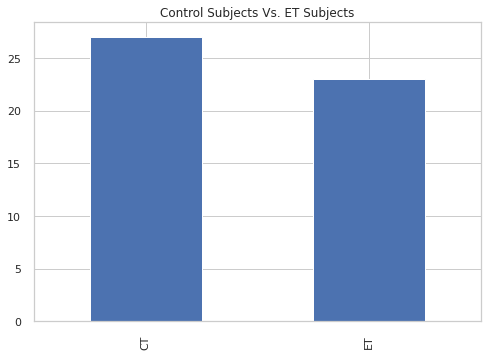

In [4]:
labels = hdf.get('source/labels')
y = labels.reset_index()['labels']
ax = y.value_counts().plot.bar(title='Control Subjects Vs. ET Subjects')
ax.set_xticklabels(["CT","ET"])

In [5]:
rd_rd = hdf['results/residues/rd']
rd_rd.head()

,C01_11,C01_12,C02_11,C02_12,C03_11,C03_12,C04_11,C04_12,C05_11,C05_12,...,control2_01,control2_02,control3_01,control3_02,control4_01,control4_02,control6_01,control6_02,control7_01,control7_02
0,2616.494977,4167.778042,2316.313494,3810.389867,2267.141506,3811.550394,2514.144329,3832.845898,2347.636091,3707.240208,...,4193.309863,6574.334674,4191.963050,5282.444233,3558.557044,6786.077485,3888.301844,6250.725763,4411.832448,6398.829138
1,2603.574851,4191.983504,2255.653513,3799.250359,2249.673932,3809.392096,2512.230656,3826.680837,2339.751504,3712.954650,...,4430.562013,7320.391593,4396.594700,5430.873025,3511.725286,6437.362428,4149.861241,6450.072294,4630.891619,6613.517568
2,2615.779950,4167.788500,2288.636990,3809.251681,2266.871954,3812.793686,2514.624837,3836.820798,2350.684227,3706.004809,...,4322.135254,6218.692017,4067.671958,5196.178662,2190.141911,3460.231467,2948.009854,5806.230663,4384.771851,6458.393641
3,2624.033204,4153.906841,2338.955456,3812.917888,2277.587148,3814.089044,2515.053243,3829.918422,2350.490043,3706.053986,...,4128.512112,4422.808586,4137.566261,5273.537294,2253.531478,3820.910669,2317.872666,6212.651716,4211.209099,6423.570700
4,2618.051843,4166.734844,2346.077098,3804.898521,2268.662020,3812.806864,2513.576047,3831.296303,2344.732659,3711.564083,...,3995.638968,3521.575215,4223.443676,5346.559807,2201.812622,3612.850661,2473.159124,4980.445584,3808.837960,6583.185559


In [14]:
rd_rd.shape

(4096, 50)

## Residues Analysis based on Pearson Correlation

As the first step we can try to visualy identify correlation between features and also with target class

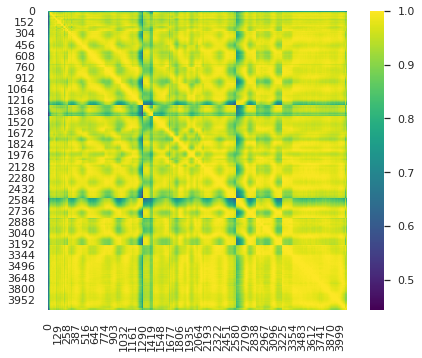

In [6]:
df=rd_rd.T
corrMatrix = df.corr("pearson")
_ = sns.heatmap(corrMatrix, square=True, cmap="viridis")

In [75]:
rd_rd.rolling(16).mean().columns

Index(['C01_11', 'C01_12', 'C02_11', 'C02_12', 'C03_11', 'C03_12', 'C04_11',
       'C04_12', 'C05_11', 'C05_12', 'C06_11', 'C06_12', 'C07_11', 'C07_12',
       'C08_11', 'T001_01', 'T002_01', 'T005_01', 'T006_01', 'T007_02',
       'T008_01', 'T009_01', 'T010_02', 'T011_02', 'T012_01', 'T012_02',
       'T013_02', 'T014_01', 'T015_02', 'T018_02', 'T020_01', 'T021_01',
       'T023_02', 'T025_02', 'T026_02', 'T027_02', 'T028_02', 'T029_02',
       'control1_01', 'control1_02', 'control2_01', 'control2_02',
       'control3_01', 'control3_02', 'control4_01', 'control4_02',
       'control6_01', 'control6_02', 'control7_01', 'control7_02'],
      dtype='object')

0.9476786435454567

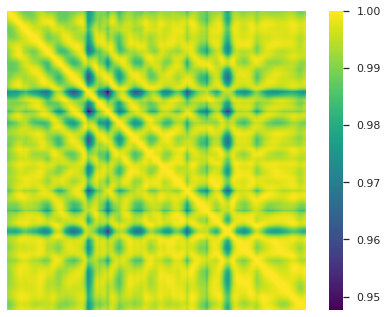

In [60]:
denom = 16
l = len(rd_rd)
corrMatrix = rd_rd.rolling(round(l/denom)).mean().dropna().T.corr("pearson")
_ = sns.heatmap(corrMatrix, square=True, cmap="viridis", yticklabels=False, xticklabels=False)
corrMatrix.min().min()

<AxesSubplot:>

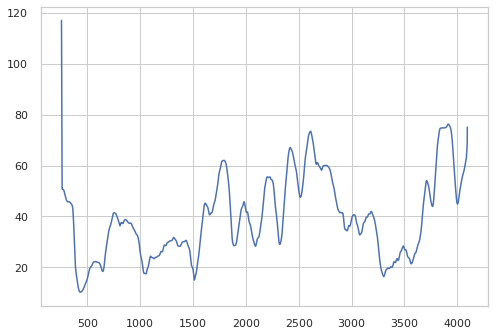

In [92]:
rd_rd.rolling(round(l/denom)).std().dropna()["T014_01"].plot()

0.01588104648970165

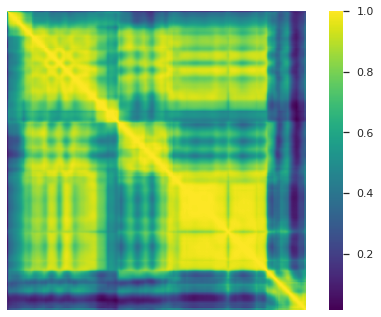

In [93]:
corrMatrix = rd_rd.rolling(round(l/denom)).std().dropna().T.corr("pearson")
_ = sns.heatmap(corrMatrix, square=True, cmap="viridis", yticklabels=False, xticklabels=False)
corrMatrix.min().min()

<AxesSubplot:>

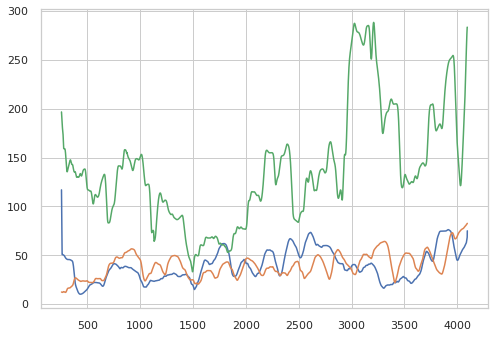

In [82]:
rd_rd.rolling(round(l/denom)).std().dropna()["T014_01"].plot()
rd_rd.rolling(round(l/denom)).std().dropna()["T001_01"].plot()
rd_rd.rolling(round(l/denom)).std().dropna()["T002_01"].plot()


<AxesSubplot:>

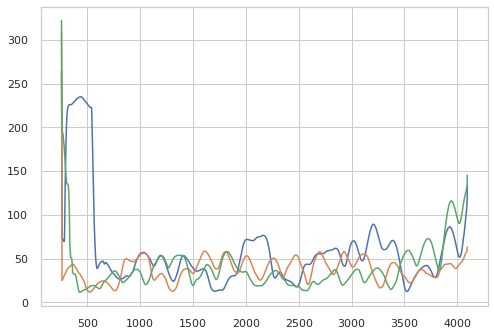

In [88]:
rd_rd.rolling(round(l/denom)).std().dropna()["control2_01"].plot()
rd_rd.rolling(round(l/denom)).std().dropna()["control6_02"].plot()
rd_rd.rolling(round(l/denom)).std().dropna()["control7_01"].plot()

There is strong correlation between all the data points

In [23]:
labels.values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
random_state = 0

X_train=rd_rd.T
y_train=labels.values

In [40]:
# Reduce dimension with LDA
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
X_train_lda=lda.transform(X_train)

In [129]:
df_lda=pd.DataFrame(X_train_lda, columns=["component1"])
df_lda["labels"]=y_train.T
df_lda.head()

,component1,labels
0,-2.944513,0.0
1,0.175766,0.0
2,-1.376940,0.0
3,-0.851779,0.0
4,-2.823350,0.0


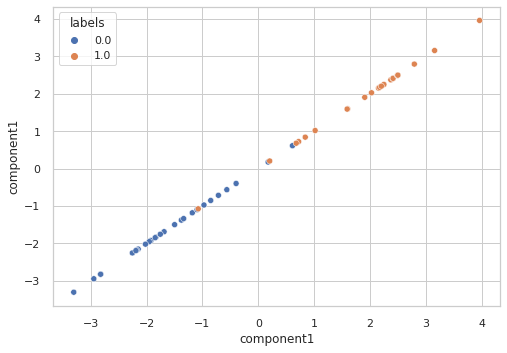

In [130]:
_=sns.scatterplot(data=df_lda, x="component1", y="component1", hue="labels")

In [128]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=random_state))
# Fit the method's model
pca.fit(X_train, y_train)
X_train_pca=pca.transform(X_train)

In [132]:
df_pca=pd.DataFrame(X_train_pca[:,:2], columns=["component1", "component2"])
df_pca["labels"]=y_train.T
df_pca.head()

,component1,component2,labels
0,-60.739228,-1.576420,0.0
1,56.138902,-0.610136,0.0
2,-69.203341,-2.843669,0.0
3,38.558283,-0.903345,0.0
4,-77.655423,-3.131088,0.0


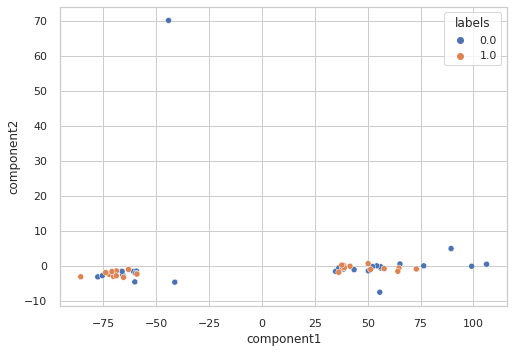

In [134]:
_=sns.scatterplot(data=df_pca, x="component1", y="component2", hue="labels")

In [147]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

score='accuracy'
X = X_train_lda
y = y_train

loo = LeaveOneOut()

In [148]:
# predictive model
clf = SVC(kernel='rbf', gamma=0.2, C=10**3)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm")
print(cv['train_score'].mean())
print("test score svm")
print(cv['test_score'].mean())

train score svm
0.9404081632653061
test score svm
0.94


In [149]:
# RandomForest
clf = RandomForestClassifier(n_estimators=30)

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm")
print(cv['train_score'].mean())
print("test score svm")
print(cv['test_score'].mean())

train score svm
0.9959183673469388
test score svm
0.9


In [153]:
# Knn
clf = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', metric='euclidean')

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm")
print(cv['train_score'].mean())
print("test score svm")
print(cv['test_score'].mean())

train score svm
0.9404081632653061
test score svm
0.92


In [154]:
# predictive model
clf = LDA()

cv = cross_validate(clf, X, y, cv=loo, scoring=score, return_train_score=True, n_jobs=-1)
print("train score svm")
print(cv['train_score'].mean())
print("test score svm")
print(cv['test_score'].mean())

train score svm
0.9514285714285714
test score svm
0.92


In [44]:
hdf.close()